# Programming Assignment 2: Visualize Network Data

## Data Visualization Course - Coursera

* Author: Michael Onishi
* Date: October 3rd, 2019

### Dataset

Tennis Grandslam Champions, taken from Wikipedia: https://en.wikipedia.org/wiki/List_of_Grand_Slam_singles_finals.
Only got rows from 2003 (when Federer won his first Grand Slam title)

In [1]:
import pandas as pd

### Loading the dataset

In [2]:
df = pd.read_csv('data/tennis-bigfour.csv')

In [3]:
df.shape

(68, 5)

In [4]:
df.head()

,Year,Tournament,Winner,Runner-up,Score
0,2019,US Open,Rafael Nadal,Daniil Medvedev,"7–5, 6–3, 5–7, 4–6, 6–4"
1,2019,Wimbledon,Novak Djokovic,Roger Federer,"7–6(7–5), 1–6, 7–6(7–4), 4–6, 13–12"
2,2019,French Open,Rafael Nadal,Dominic Thiem,"6–3, 5–7, 6–1, 6–1"
3,2019,Australian Open,Novak Djokovic,Rafael Nadal,"6–3, 6–2, 6–3"
4,2018,US Open,Novak Djokovic,Juan Martín del Potro,"6–3, 7–6(7–5), 6–4"


### Data Preparation

In [5]:
df.Tournament.unique()

array(['US Open', 'Wimbledon', 'French Open', 'Australian Open',
       'Wimbledon Championships (Open Era)'], dtype=object)

In [6]:
# Wimbledon is duplicated
df.Tournament.replace(to_replace='Wimbledon Championships (Open Era)', value='Wimbledon', inplace=True)

In [7]:
df.Tournament.unique()

array(['US Open', 'Wimbledon', 'French Open', 'Australian Open'],
      dtype=object)

In [8]:
df.Winner.value_counts()

Roger Federer            20
Rafael Nadal             19
Novak Djokovic           16
Stan Wawrinka             3
Andy Murray               3
Andy Roddick              1
Andre Agassi              1
Juan Carlos Ferrero       1
Gastón Gaudio             1
Marat Safin               1
Juan Martín del Potro     1
Marin Čilić               1
Name: Winner, dtype: int64

In [9]:
# only considering the 3 "outliers"
players = df.Winner.value_counts()[:3].keys().to_list()
tournaments = df.Tournament.unique()

In [10]:
print(players)
print(tournaments)

['Roger Federer', 'Rafael Nadal', 'Novak Djokovic']
['US Open' 'Wimbledon' 'French Open' 'Australian Open']


In [11]:
# renaming the other player names so they get grouped together
df.Winner = df.Winner.apply(lambda x: x if x in players else 'Others')

### Constructing the graph

In [12]:
from graphviz import Graph
import os
os.environ["PATH"] += os.pathsep + '/usr/local/bin'

In [13]:
dot = Graph(engine='circo')

for t in tournaments:
    dot.node(t, shape='tripleoctagon', fillcolor='blue', style='filled', fontcolor='white', width='1.5', height='1.5')

for p in players:
    dot.node(p, shape='Mcircle', fillcolor='yellow', style='filled', width='1.5')

dot.node('Others', shape='Mcircle', fillcolor='yellow', style='filled', width='1.5')
    
for index, row in df.iterrows():
    dot.edge(row.Winner, row.Tournament)

#dot.attr('graph', {'overlap': 'false'})
dot.attr(nodesep='0.2')
dot.attr(labelloc='t')
dot.attr(label="Men's Singles Tennis Grandslam Champions from 2003")

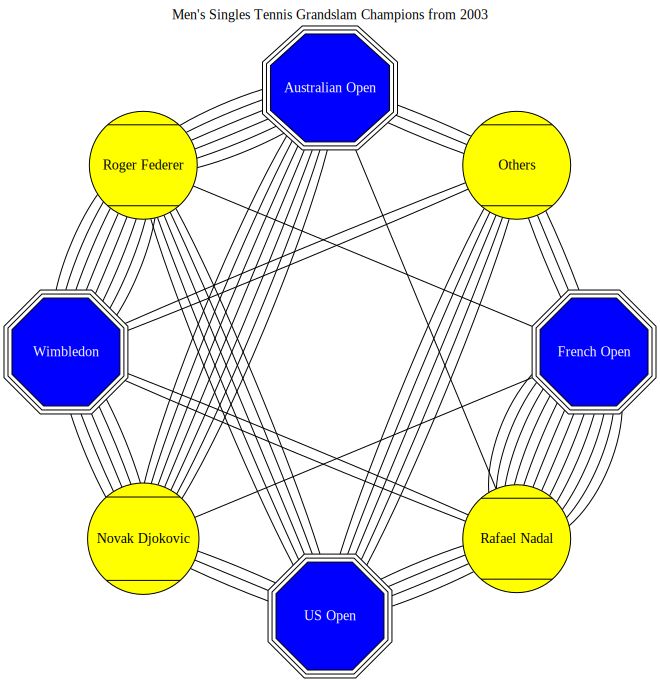

In [14]:
dot

### A paragraph about the visualization

I have used a tennis dataset, showing the grandslams men's singles champions from 2003. First because I am a tennis player and lover! Second, the relationship about the winners and tournaments may be shown nicely using graph / network diagrams.

I only used data starting from the 2003, because it was the first grandslam title won by Roger Federer, and he is still active! Also aggregated players with 3 or less titles in this period. That was because they are too far away from the top 3 winners, so that aggregation would turn this graph cleaner.

I created two types of nodes: one representing the players and other representing the tournaments. I used different styles (shape and colors), so the visualization would be easier to follow. The circo engine from Graphviz did a decent job organizing the nodes.

This graph shows a lot: 
* this 3 guys (Federer, Nadal and Djokovic) are really out of this world. It's impressive how they dominated the most important tennis tournaments in the last 16 years!
* from the French Open (Roland Garros) node, we can see that the edges are very concentrated to Nadal's node, showing that he can easily be considered the king of clay surface;
* finally, we can see that US Open appears to be the most competitive tournament, with edges distributed almost evenly among the players.